# Introduction

1. Testing on cartpole
2. Note: I've only ever solved cartpole with A2C when I was doing Monte Carlo estimate of the return.
3. Here I'm trying to do it with a Q-funtion NN and experience replay
4. From doing some quick googling, I see A2C is not usually done with experience replay. Hmm. They usually to MC estiamte of the return, or n-step TD updates.
5. This paper combines experience replay with A2C. But he doens't jsut do vanilla experience replay; he does
   priorities ER, with some other tricks
6. By making by buffer size small, I could crudely approximate this. I'll try that and see what happens. I expect it to be very sample inefficient, so I'll run for large number of episodes

7. I'm inclined to think that there must be a bug somewhere -- cartpole is so easy, it should be solvable

https://arxiv.org/pdf/1611.01224.pdf

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


agent.py:103: RuntimeWarning: invalid value encountered in less
  action = np.random.choice(self.actions, p=probs)


(episode, score) = (50, 8.0)
(episode, score) = (100, 9.0)
(episode, score) = (150, 9.0)
(episode, score) = (200, 9.0)
(episode, score) = (250, 9.0)
(episode, score) = (300, 9.0)
(episode, score) = (350, 11.0)
(episode, score) = (400, 10.0)
(episode, score) = (450, 11.0)
(episode, score) = (500, 10.0)
(episode, score) = (550, 10.0)
(episode, score) = (600, 10.0)
(episode, score) = (650, 9.0)
(episode, score) = (700, 10.0)
(episode, score) = (750, 8.0)
(episode, score) = (800, 9.0)
(episode, score) = (850, 8.0)
(episode, score) = (900, 9.0)
(episode, score) = (950, 10.0)
(episode, score) = (1000, 9.0)


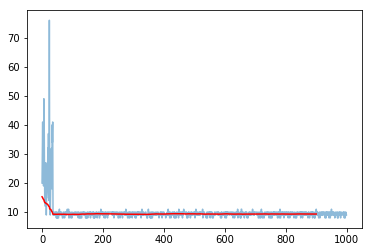

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import Agent
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(0)
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n


#Agent
lr,gamma,tau = 3*10**-4, 0.99, 0.1 
clipnorm, verbose, alpha = False, False, 0.001
agent = Agent(input_dim, output_dim, lr, gamma, tau, alpha, clipnorm, verbose)
agent.memory_size = 1000
agent.batchsize = 32


#Train
EPISODES = 10**3
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = agent.make_tensor(state)
    reward_sum = 0
    done = False
    while not done:
        
        #Do main step
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = agent.make_tensor(next_state)
        agent.remember(state[0],action,reward,next_state[0],done) #want to remember state as a vec
        state = next_state

        #Learn
        if e > 1:
            agent.learn()
    
    #Print results
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores,alpha=0.5)
plt.plot(agent.window_average(scores,100),'r-')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import Agent
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(0)
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n


#Agent
lr,gamma,tau = 3*10**-4, 0.99, 0.1 
clipnorm, verbose, alpha = True, False, 0.001
agent = Agent(input_dim, output_dim, lr, gamma, tau, alpha, clipnorm, verbose)
agent.memory_size = 1000
agent.batchsize = 32


#Train
EPISODES = 500
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = agent.make_tensor(state)
    reward_sum = 0
    done = False
    while not done:
        
        #Do main step
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = agent.make_tensor(next_state)
        agent.remember(state[0],action,reward,next_state[0],done) #want to remember state as a vec
        state = next_state

        #Learn
        if e > 1:
            agent.learn()
    
    #Print results
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores,alpha=0.5)
plt.plot(agent.window_average(scores,100),'r-')

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, 8.0)
(episode, score) = (100, 9.0)


KeyboardInterrupt: 

In [4]:
agent.actor.model.predict(state)

array([[nan, nan]], dtype=float32)

In [6]:
agent.criticQ.model.predict([state,action])

ValueError: Error when checking input: expected input_12 to have 2 dimensions, but got array with shape ()